In [113]:
import glob
import json
import gzip
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [114]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [115]:
mapping = pd.read_csv('../reddit/data/subreddits.tsv', sep='\t')['subreddit'].to_dict()
sns.set_style("whitegrid")

In [126]:
losses = []
for c in set(range(0,30)) - set([18]):
    fs2 = glob.glob(f'../logs/subredd*/single_{c}/*/metrics/*/*/epoch-2/log.json')
    for f in fs2:
        d = json.load(open(f))
        if 'standard_' not in f:
            item = {'epoch': 2,
                    'model': f.split('/')[4].split('_')[-2],
                    'accuracy': np.mean(d['test_accuracy']),
                    'subreddit': c,#mapping[c],
                    'n_posts': f.split('/')[4].split('_')[-1],
                    'subreddit_nr': c}
            losses.append(item)
    ldf = pd.DataFrame(losses).sort_values(by='accuracy')

/home/roberta/venvs/tw-langmod/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/roberta/venvs/tw-langmod/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [127]:
pd.read_csv('../reddit/data/subreddits.tsv', sep='\t')

,subreddit,n_posts,n_authors
0,teenagers,494414,70541
1,NoStupidQuestions,276752,105854
2,buildapc,268232,109713
3,FortNiteBR,235181,66522
4,unpopularopinion,196890,81467
...,...,...,...
363134,FreeKarmaForU3,1,1
363135,cryptoliberators,1,1
363136,FreeKarmaForMemes,1,1
363137,cryptolobe,1,1


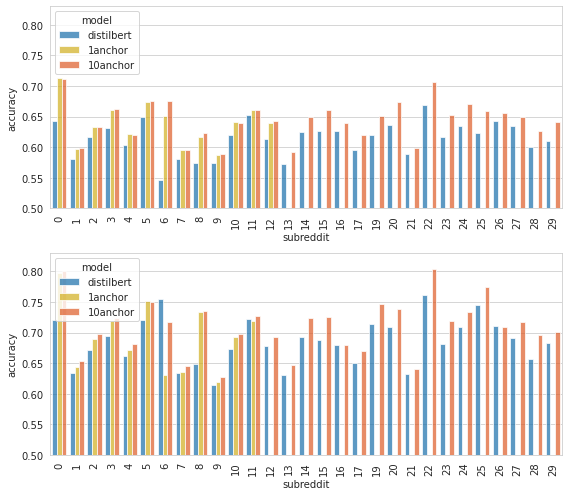

In [128]:
f, ax = plt.subplots(figsize=(8,7), nrows=2, ncols=1)
for i, c in enumerate(['1','10']):
    sns.barplot(data=ldf[ldf['n_posts']==c], 
                x='subreddit', y='accuracy', 
                hue='model', 
                palette=["#0073C2FF", "#EFC000FF", "#FC4E07"],
                ax=ax[i], 
                alpha=.7)
    ax[i].set_ylim(.5,.83)
    ax[i].set_xticklabels(labels=ax[i].get_xticklabels(), 
                          rotation=90)
plt.tight_layout()
plt.show()